In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

## Load the data

In [2]:
#loads data from Part 2 (b) into a pandas dataframe
dj_df = pd.read_csv('data/DowJones-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date') # index_col=False
nasdaq_df = pd.read_csv('data/NASDAQ-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')
nyse_df = pd.read_csv('data/NYSE-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')
sp500_df = pd.read_csv('data/SP500-HistoricalPrices.csv', usecols=['Date','Close'],index_col='Date')

## Dow Jones Data

In [3]:
# check out the data
dj_df.head()

,Close
Date,
2/2/18,25520.96
2/1/18,26186.71
1/31/18,26149.39
1/30/18,26076.89
1/29/18,26439.48


In [4]:
# look at dow jones data - stats
dj_df.describe()

,Close
count,252.000000
mean,22281.564603
std,1640.336768
min,20052.420000
25%,20953.622500
50%,21790.665000
75%,23412.655000
max,26616.710000


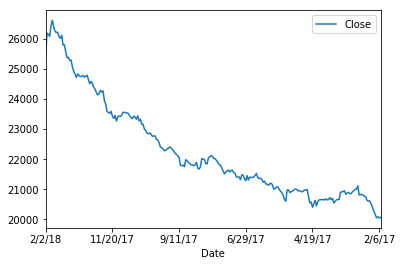

In [5]:
dj_df.plot.line()

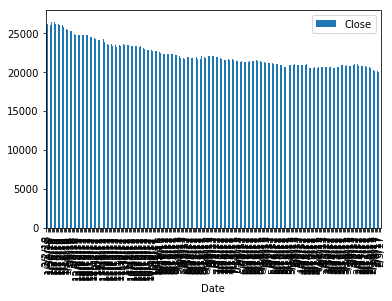

In [6]:
dj_df.plot.bar()

## Question 1: Which do you think is a more effective representation and why? Justify with the expressiveness and effectiveness concepts discussed in class as well as perceptual ordering.

The line series chart is much more effective than the bar chart because with this set of data we are looking to show a trend over time, rather than show discoveries by a category, or maybe visualize variables in the data. Line graphs tend to work best for continuous data, whereas bar and column graphs work best for categorical data. In this case, more tweaking needs to be done to clearly see the dates on the x axis as well.

## NASDAQ Data

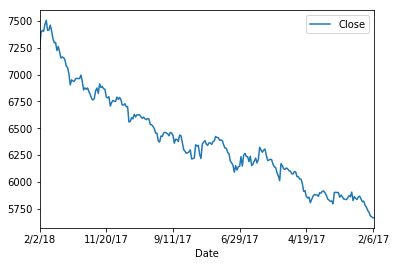

In [7]:
nasdaq_df.plot.line()

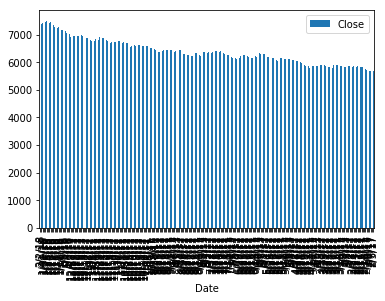

In [8]:
nasdaq_df.plot.bar()

## NYSE Data

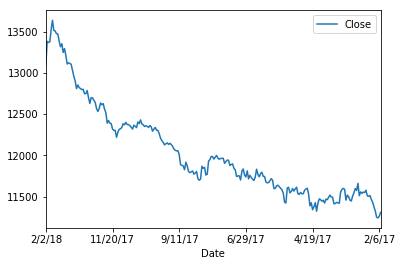

In [9]:
nyse_df.plot.line()

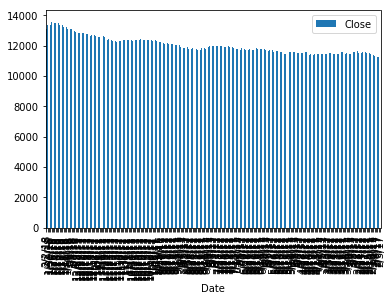

In [10]:
nyse_df.plot.bar()

## SP500 Data

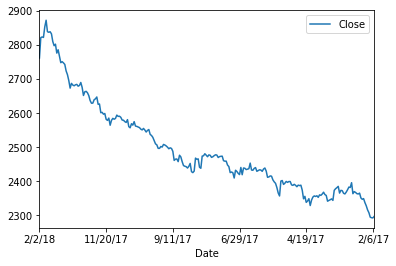

In [11]:
sp500_df.plot.line()

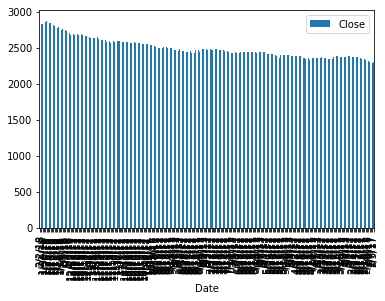

In [12]:
sp500_df.plot.bar()

## Additional Visualizations (3)

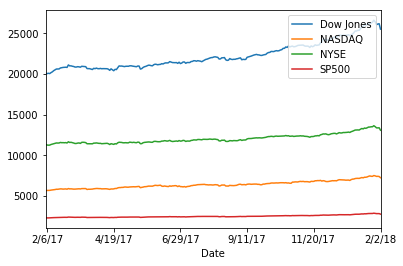

In [13]:
plt.figure()
dj_df.Close.plot(label="Dow Jones")
nasdaq_df.Close.plot(label="NASDAQ")
nyse_df.Close.plot(label="NYSE")
sp500_df.Close.plot(label="SP500")
plt.gca().invert_xaxis()
plt.legend()

### Time series data
For each data set (index), I labeled each on a different color so that it was easy to decipher which index is which. Over all, it is easy to tell that each index is in an upward trend, but it is harder to tell how similar they are since they're not normalized.

In [15]:
# create a new dataframe
new_df = pd.concat([dj_df['Close'], nasdaq_df['Close'], nyse_df['Close'], sp500_df['Close']], axis=1, keys=['Dow', 'NASDAQ', 'NYSE', 'S&P500'])

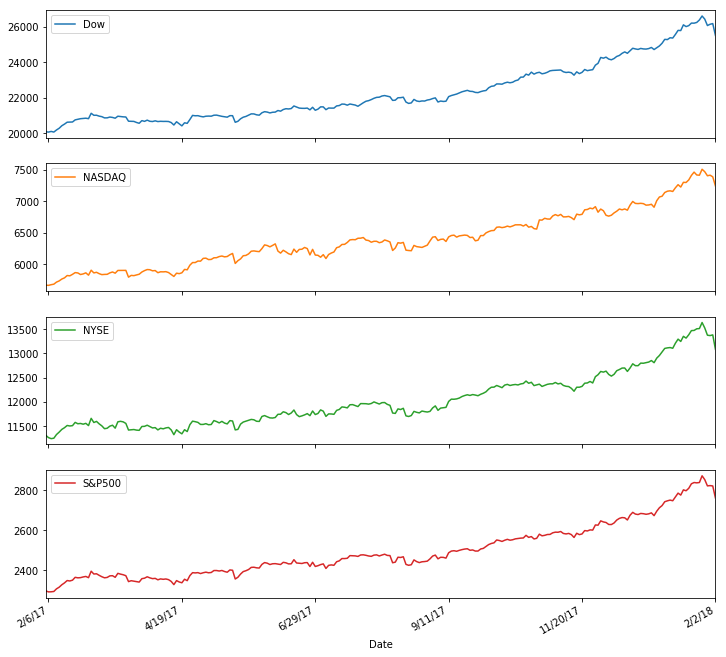

In [16]:
new_df.plot(subplots=True, figsize=(12, 12))
plt.gca().invert_xaxis()
plt.legend(loc='best')

### Small multiples - time series
Again, for each data set (index), I gave each index a different color. In these small multiples, since the y axis is normalized it is much easier to see that the trends are extremely similar in all indexes even though they are on different scales.

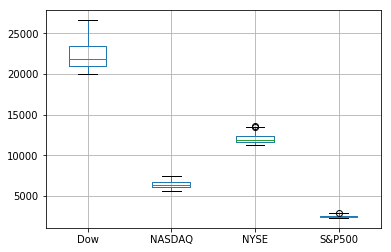

In [17]:
plt.figure();
bp = new_df.boxplot()

### Box and whisker
I didn't choose to change the colors of the box and whisker graph because I didn't see any visual benefit. Here, it is easy to see the difference in ranges and scales between the indexes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125fdc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112723e10>]], dtype=object)

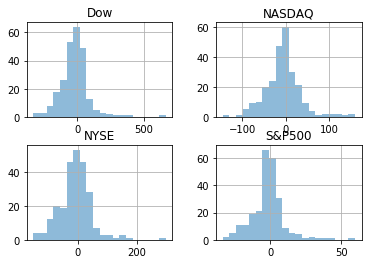

In [18]:
plt.figure()
new_df.diff().hist(alpha=0.5, bins=20)

### Plotting - Histogram
I chose to plot normalized histograms for the different indexes in order to see if there is a way to tell if one index looks to perform better than another. I didn't find it necessary to add multiple colors since the labels showed the difference between categories (indexes).

## Extra visuals - playing around

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127b6320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112bfb0f0>]], dtype=object)

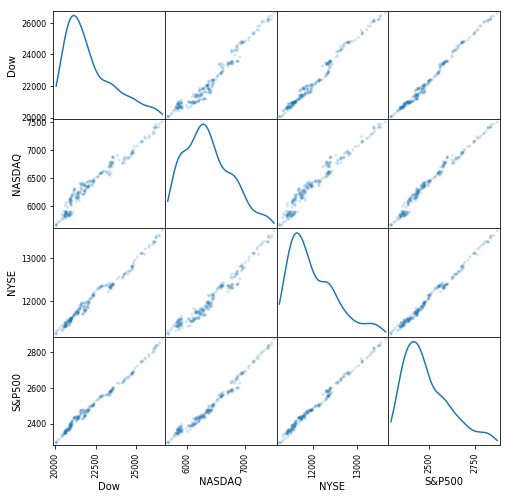

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_df, alpha=0.2, figsize=(8, 8), diagonal='kde')

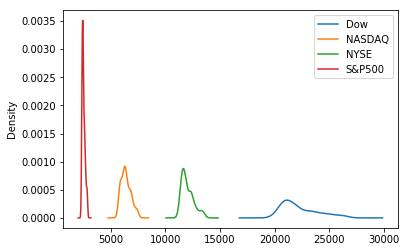

In [20]:
new_df.plot(kind='kde')

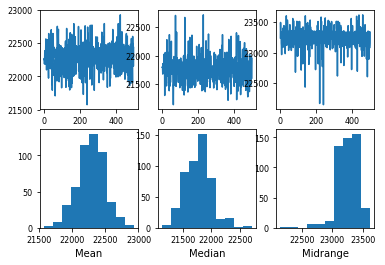

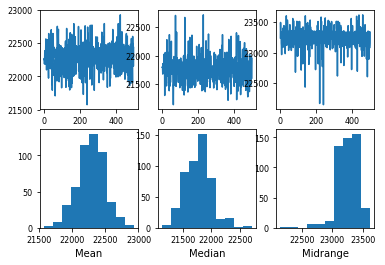

In [21]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(dj_df) #, size=50, samples=500